# 10.2 조건부엔트로피

In [32]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

# 컴퓨터에 이미 깔린 한글 폰트 적용하면 됨.
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 설치된 폰트 중 한글 지원하는 폰트 찾기 : Nanum이나 Gothic 등 검색
# import matplotlib.font_manager as fm
# font_list = [font.name for font in fm.fontManager.ttflist]
# for f in font_list:
#     if 'Gothic' in f:
#         print(f)

### 예제 10.2.1

다음은 붓꽃 데이터 중 버지니카(virginica)와 베르시칼라(versicolor) 종의 데이터만 임포트하는 코드다.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])          # 앞의 array의 값이 뒤의 array 값들 중에 포함이 되는지 판별하는 함수 : true/false  -- 즉, target값이 1이나 2 값을 갖는 row만 선택하기 위한 indexing.
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


C:\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python37\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python37\lib\site-packages\seaborn\distributions.py:2056: Future

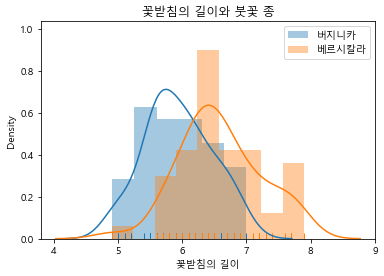

In [11]:
sns.distplot(df[df.species == 1]["sepal length (cm)"], hist=True, rug=True, label="버지니카")
sns.distplot(df[df.species == 2]["sepal length (cm)"], hist=True, rug=True, label="베르시칼라")
plt.legend()
plt.xlabel("꽃받침의 길이")
plt.title("꽃받침의 길이와 붓꽃 종")
plt.show()

#### (1) 붓꽃 데이터에서 꽃받침의 길이(sepal length)의 최솟값과 최댓값 구간을 0.05 간격으로 나누어 각각의 값을 기준값으로 하였을 때 조건부엔트로피가 어떻게 변하는지 그래프로 그려라.

In [61]:
max = df.iloc[:,0].max()
min = df.iloc[:,0].min()
print(max, min)
df

7.9 4.9


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,determine
0,7.0,3.2,4.7,1.4,1,False
1,6.4,3.2,4.5,1.5,1,False
2,6.9,3.1,4.9,1.5,1,False
3,5.5,2.3,4.0,1.3,1,False
4,6.5,2.8,4.6,1.5,1,False
...,...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2,False
96,6.3,2.5,5.0,1.9,2,False
97,6.5,3.0,5.2,2.0,2,False
98,6.2,3.4,5.4,2.3,2,False


[1.0, 1.0, 0.9921505417657337, 0.9921505417657337, 0.9854129092560906, 0.9854129092560906, 0.9777731489110747, 0.9777731489110747, 0.9777731489110747, 0.9777731489110747, 0.9694770530143693, 0.9694770530143693, 0.9214431574645288, 0.9214431574645288, 0.8932597776751744, 0.8932597776751744, 0.8594091277095427, 0.8594091277095427, 0.8828123014105905, 0.8828123014105905, 0.8766158010393013, 0.8766158010393013, 0.860714271586387, 0.860714271586387, 0.8395000263554215, 0.8395000263554215, 0.8413871497735644, 0.8413871497735644, 0.877650867560479, 0.877650867560479, 0.90539323548625, 0.90539323548625, 0.9306576387006182, 0.9306576387006182, 0.9040233826945792, 0.9040233826945792, 0.9042037171763908, 0.9042037171763908, 0.9040867654123343, 0.9040867654123343, 0.9108022259351823, 0.9108022259351823, 0.8681592744048966, 0.8681592744048966, 0.8801677933164548, 0.8801677933164548, 0.9149755871180102, 0.9149755871180102, 0.9261957549212048, 0.9261957549212048, 0.9372355134892061, 0.937235513489206

C:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

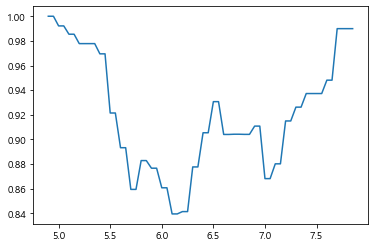

In [62]:
def cond_entropy(v):
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

def calculate_entropy(df, thres):
    df['determine'] = df['sepal length (cm)'] > thres
    pivot_table = df.groupby(["determine", "species"]).size().unstack().fillna(0)
    return cond_entropy(pivot_table.values)

grid = np.array(range(int(min*20), int(max*20), 1)) / 20
entropies = []
for thres in grid:
    entropies.append(calculate_entropy(df, thres))
print(entropies)

sns.lineplot(grid, entropies)

#### (2) 꽃받침의 길이를 특징으로 사용하였을 때 어떤 값을 기준값으로 하는 것이 가장 좋은가?

In [63]:
ent_min = np.array(entropies).min()
grid[entropies.index(ent_min)]

6.1

#### (3) 꽃받침의 폭(sepal width)에 대해 위의 분석을 실시하라. 이 때는 기준값이 어떻게 되는가?

3.8 2.0
[0.9899271353749991, 0.9899271353749991, 0.9899271353749991, 0.9899271353749991, 0.9921505417657337, 0.9921505417657337, 0.9694770530143693, 0.9694770530143693, 0.941763200545769, 0.941763200545769, 0.9677939373126696, 0.9677939373126696, 0.9662988311371372, 0.9662988311371372, 0.9664292412733159, 0.9664292412733159, 0.9813317917030369, 0.9813317917030369, 0.9501432223912655, 0.9501432223912655, 0.9682860053476651, 0.9682860053476651, 0.9677939373126696, 0.9677939373126696, 0.9693052782722091, 0.9693052782722091, 0.9777731489110747, 0.9777731489110747, 0.969330601745662, 0.969330601745662, 0.969330601745662, 0.969330601745662, 0.9797055519993869, 0.9797055519993869, 0.9797055519993869, 0.9797055519993869]


C:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

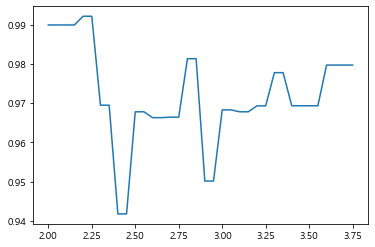

In [64]:
def calculate_entropy_width(df, thres):
    df['determine'] = df['sepal width (cm)'] > thres
    pivot_table = df.groupby(["determine", "species"]).size().unstack().fillna(0)
    return cond_entropy(pivot_table.values)

width_max = df.iloc[:,1].max()
width_min = df.iloc[:,1].min()
print(width_max, width_min)

width_grid = np.array(range(int(width_min*20), int(width_max*20), 1)) / 20
width_entropies = []
for thres in width_grid:
    width_entropies.append(calculate_entropy_width(df, thres))
print(width_entropies)

sns.lineplot(width_grid, width_entropies)

In [65]:
width_ent_min = np.array(width_entropies).min()
width_grid[width_entropies.index(width_ent_min)]

2.4

#### (4) 꽃받침의 길이(sepal length)와 꽃받침의 폭(sepal width) 중 하나를 특징으로 선택해야 한다면 어떤 것을 선택해야 하는가?

In [67]:
ent_min, width_ent_min

(0.8395000263554215, 0.941763200545769)

꽃받침의 길이(sepal length)의 조건부 엔트로피 최소값이 더 작으므로, 꽃받침의 길이(sepal length)가 꽃받침의 폭(sepal width)보다 종을 구분하는 데에 효과적이다.